In [16]:
from os.path import realpath
import glob
import cv2
import os
import numpy as np
import pandas as pd
import join as join
import matplotlib.pyplot as plt

In [3]:

path1 = "C:\\Users\cezar\OneDrive\Documentos\PDI - CLASSIFICACAO\Classificacao\imagens_cortadas\\"
path2 = "C:\\Users\cezar\OneDrive\Documentos\PDI - CLASSIFICACAO\Classificacao\lote_de_imagens_PDI"

In [2]:
externo = []
interno = []
imagens_externas = []
imagens_internas = []

In [4]:
print(os.listdir("./imagens_cortadas/"))

['LOTE_EXTERNO_10_R1', 'LOTE_EXTERNO_2_R1', 'LOTE_EXTERNO_3_R1', 'LOTE_EXTERNO_4_R1', 'LOTE_EXTERNO_5_R1', 'LOTE_EXTERNO_6_R1', 'LOTE_EXTERNO_8_R1', 'LOTE_EXTERNO_9_R1', 'LOTE_INTERNO_10_R2', 'LOTE_INTERNO_1_R2', 'LOTE_INTERNO_2_R2', 'LOTE_INTERNO_3_R2', 'LOTE_INTERNO_4_R2', 'LOTE_INTERNO_5_R2', 'LOTE_INTERNO_6_R2', 'LOTE_INTERNO_8_R2', 'LOTE_INTERNO_9_R2']


In [5]:
#['/home/luan/Desktop/feijao/Classificacao-main/imagens', 'cortadas/LOTE', 'INTERNO', '9', 'R', '1/LOTE', 'INTERNO', '9', 'R', '1', 'semente', '49.jpg']

In [14]:
lower = np.array([94, 20, 2])
upper = np.array([145, 255, 255])

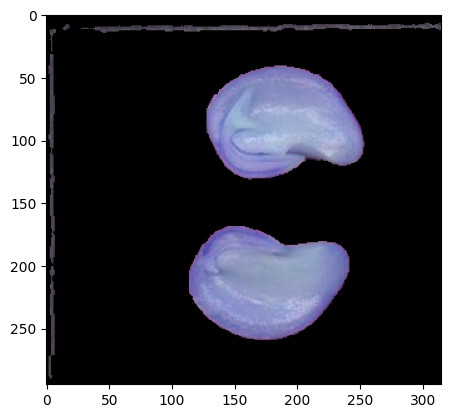

In [17]:
for dic in glob.glob("C:\\Users\cezar\OneDrive\Documentos\PDI - CLASSIFICACAO\Classificacao\imagens_cortadas\*"):
    for img_path in glob.glob(os.path.join(dic, "*.jpg")):
        label = img_path.split("_")
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = cv2.resize(img, (256, 256))
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        mask = cv2.inRange(hsv, lower, upper)

        img = cv2.bitwise_and(img ,img, mask = mask)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        
        if(label[5] == 'EXTERNO'):
            imagens_externas.append(np.array(img).reshape(-1))
            externo.append([label[6], 1, label[-1]])
        if(label[5] == 'INTERNO'):
            imagens_internas.append(np.array(img).reshape(-1))
            plt.imshow(img)
            interno.append([label[6], 2, label[-1]])


In [18]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [19]:
imagens_internas

[array([ 85,  74, 140, ...,  89,  82, 100], dtype=uint8),
 array([ 76,  67, 159, ...,  75,  65, 159], dtype=uint8),
 array([109,  94,  97, ..., 110,  94, 107], dtype=uint8),
 array([92, 75, 92, ..., 95, 82, 99], dtype=uint8),
 array([79, 65, 77, ..., 88, 71, 81], dtype=uint8),
 array([74, 56, 79, ..., 62, 46, 59], dtype=uint8),
 array([76, 64, 75, ..., 85, 72, 91], dtype=uint8),
 array([103,  83, 110, ...,  75,  63,  79], dtype=uint8),
 array([ 91,  79,  86, ..., 110, 100, 109], dtype=uint8),
 array([ 88,  76, 105, ...,  94,  82,  96], dtype=uint8),
 array([ 78,  65, 108, ...,  78,  66, 110], dtype=uint8),
 array([ 79,  70, 147, ..., 115,  93, 103], dtype=uint8),
 array([ 76,  62,  79, ...,  76,  65, 121], dtype=uint8),
 array([ 92,  74,  85, ..., 100,  89,  95], dtype=uint8),
 array([75, 70, 72, ..., 90, 77, 96], dtype=uint8),
 array([ 78,  65,  82, ...,  92,  87, 107], dtype=uint8),
 array([77, 57, 82, ..., 83, 71, 86], dtype=uint8),
 array([92, 81, 85, ..., 55, 41, 70], dtype=uint8)

In [20]:
img_interna = pd.DataFrame(imagens_internas)

In [21]:
img_interna = img_interna/255

In [22]:
img_externas = pd.DataFrame(imagens_externas)

In [23]:
img_externas = img_externas/255

In [24]:
externo = pd.DataFrame(externo, columns=['LOTE', 'REPETICAO', 'SEMENTE'])

In [25]:
interno = pd.DataFrame(interno, columns=['LOTE', 'REPETICAO', 'SEMENTE'])

In [26]:
externo = pd.concat([externo, img_externas], axis=1)

In [27]:
interno = pd.concat([interno, img_interna], axis=1)

In [28]:
externo.to_csv('externo.csv', index_label=False)

In [29]:
interno.to_csv('interno.csv', index_label=False)